In [3]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torch.nn as nn
from models import Discriminator


dis = Discriminator()
dis = torch.load('wgan_gp_netD.pkl', map_location=torch.device('cpu'))
# print(dis)
dis_cut = nn.Sequential(*list(dis.children())[:-2])
dis_cut = dis_cut.float()


In [4]:
# Open the exemplars
exemplars = pd.read_csv('exemplar_spectra.csv', header=None)
exemplars = np.array(exemplars)

In [7]:
exemplars_name = np.array(list(Names.keys()))

NameError: name 'Names' is not defined

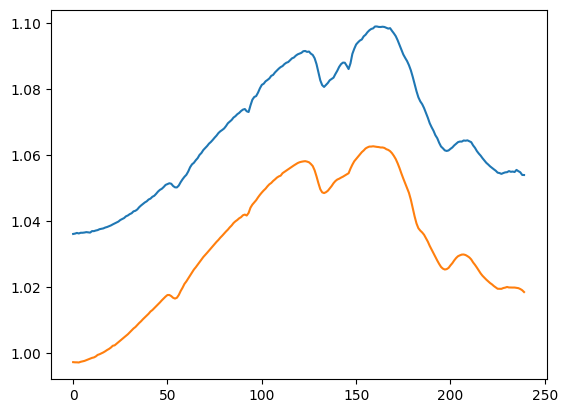

In [59]:
calcite = exemplars[9]
chlorite = exemplars[22]
jarosite = exemplars[6]
plt.plot(calcite)
plt.plot(chlorite)

In [84]:


rep = dis_cut(test)
calcite_gan = dis_cut(torch.tensor(calcite).double())
chlorite_gan = dis_cut(torch.tensor(chlorite).double())
jarosite_gan = dis_cut(torch.tensor(jarosite).double())

combined_data = np.vstack([calcite_gan, chlorite_gan, jarosite_gan])


1/1 [==============================] - 0s 17ms/step


In [7]:
from spectral.io import envi

spectra = envi.open(r'C:\Users\jourd\OneDrive\Documents\UCL\Masters_Dissertation\Final_Code\Auto_mapping_ratio\frt000093be_07_if166l_trr3\normalised.hdr')
guess = envi.open(r'C:\Users\jourd\OneDrive\Documents\UCL\Masters_Dissertation\Final_Code\Auto_mapping_ratio\frt000093be_07_if166l_trr3\smoothed_5_Cosine_BestGuess.hdr')

21


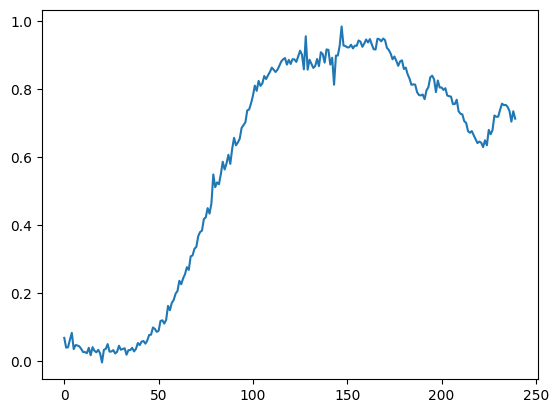

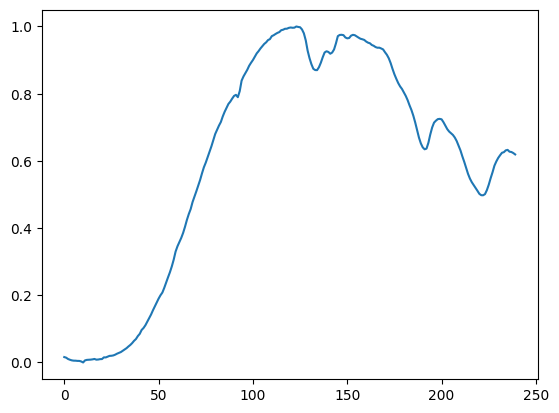

1/1 [==============================] - 0s 30ms/step


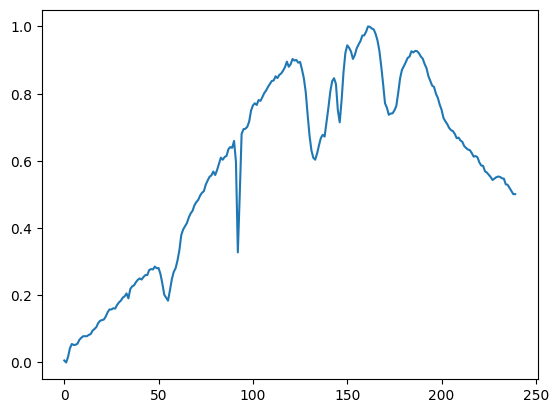

In [26]:
x = 200
y = 570

pixel_guess = guess[x,y]
spectra_pixel = spectra[x,y]
index = np.argmax(pixel_guess)
print(index)
exemplar_pixel = exemplars[index]
# normalise exempalr
exemplar_pixel = (exemplar_pixel - np.min(exemplar_pixel)) / (np.max(exemplar_pixel) - np.min(exemplar_pixel))
random_pix = (exemplars[10] - np.min(exemplars[10])) / (np.max(exemplars[10]) - np.min(exemplars[10]))
random_pix = random_pix.reshape(240, 1)


plt.plot(spectra_pixel)
plt.show()
plt.plot(exemplar_pixel)
plt.show()
plt.plot(random_pix)

pixel_gan = dis_cut(torch.tensor(spectra_pixel).double())
exemplar_gan = dis_cut(torch.tensor(exemplar_pixel).double())
random_gan = dis_cut(torch.tensor(random_pixel).double())



IndexError: list index out of range

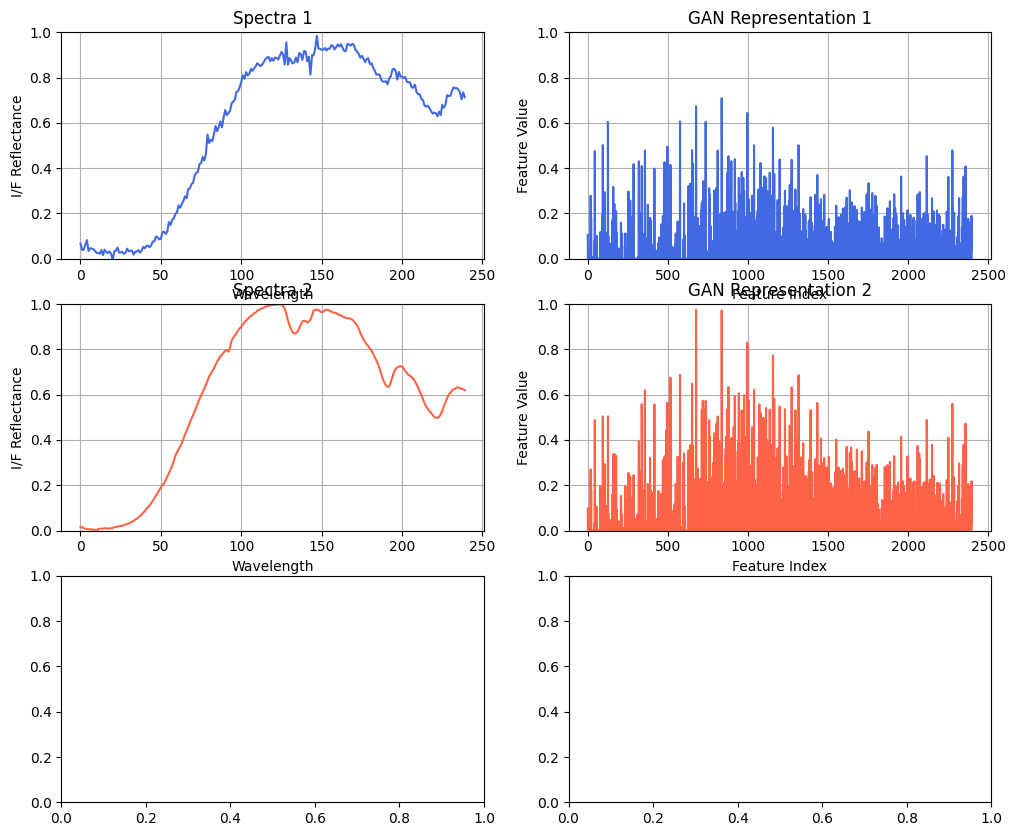

In [27]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10))  # 4 rows, 2 columns

colours = ['royalblue', 'tomato', 'forestgreen']

spectra_list = [spectra_pixel, exemplar_pixel, random_pix]
gan_list = [pixel_gan, exemplar_gan, random_gan]
# Assuming spectra_list and gan_list contain 4 spectra and GAN representations respectively
for i in range(3):
    # Plot spectra on the left column
    axs[i, 0].plot(spectra_list[i], color=colors[i])
    axs[i, 0].set_title(f'Spectra {i+1}')
    axs[i, 0].set_xlabel('Wavelength')
    axs[i, 0].set_ylabel('I/F Reflectance')
    axs[i, 0].set_ylim([0, 1])
    axs[i, 0].grid(True)
    
    # Plot GAN representation on the right column
    axs[i, 1].plot(gan_list[i][0], color=colours[i])
    axs[i, 1].set_title(f'GAN Representation {i+1}')
    axs[i, 1].set_xlabel('Feature Index')
    axs[i, 1].set_ylabel('Feature Value')
    axs[i, 1].set_ylim([0, 1])
    axs[i, 1].grid(True)

plt.tight_layout()
plt.savefig('spectra_gan_rep.png', dpi = 400)
plt.show()


1/1 [==============================] - 0s 19ms/step


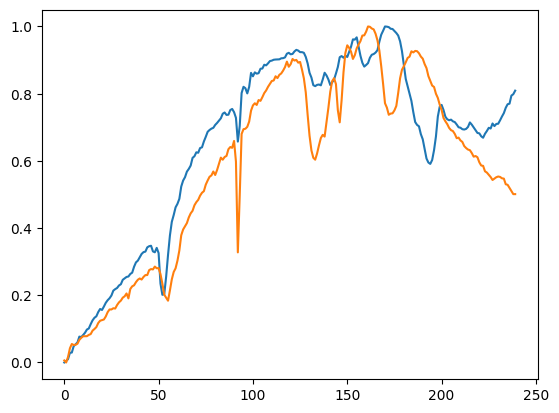

In [18]:
for i in range(len(exemplars)):
    exemplars[i] = (exemplars[i] - np.min(exemplars[i])) / (np.max(exemplars[i]) - np.min(exemplars[i]))


plt.plot(exemplars[7])
plt.plot(exemplars[10])

mineral1 = exemplars[7]
mineral2 = exemplars[10]

mineral1_gan = dis_cut(torch.tensor(mineral1).double())
mineral2_gan = dis_cut(torch.tensor(mineral2).double())


In [21]:
from sklearn.metrics.pairwise import cosine_similarity

normal_cosine = cosine_similarity(mineral1.reshape(1, 240), mineral2.reshape(1, 240))
GAN_cosine = cosine_similarity(mineral1_gan, mineral2_gan)
normal_cosine, GAN_cosine

(array([[0.98669796]]), array([[0.8490225]], dtype=float32))

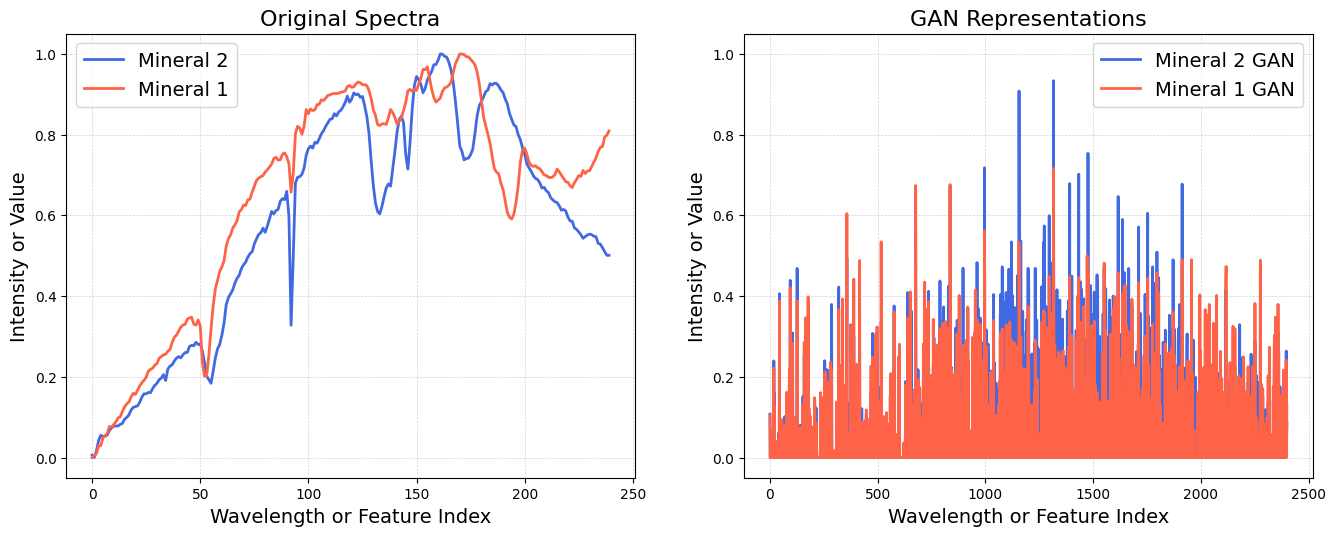

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Define a color palette and other visual attributes
colors = ['royalblue', 'tomato']
linewidth = 2
fontsize = 14

# Plotting the minerals on the left
axs[0].plot(mineral2, color=colors[0], linewidth=linewidth, label='Mineral 2')
axs[0].plot(mineral1, color=colors[1], linewidth=linewidth, label='Mineral 1')
axs[0].set_title('Original Spectra', fontsize=fontsize+2)
axs[0].set_xlabel('Wavelength or Feature Index', fontsize=fontsize)
axs[0].set_ylabel('Intensity or Value', fontsize=fontsize)
axs[0].legend(fontsize=fontsize)
axs[0].grid(True, color='lightgray', linestyle='--', linewidth=0.5)

# Plotting the GAN representations on the right
axs[1].plot(mineral2_gan[0], color=colors[0], linewidth=linewidth, label='Mineral 2 GAN')
axs[1].plot(mineral1_gan[0], color=colors[1], linewidth=linewidth, label='Mineral 1 GAN')
axs[1].set_title('GAN Representations', fontsize=fontsize+2)
axs[1].set_xlabel('Wavelength or Feature Index', fontsize=fontsize)
axs[1].set_ylabel('Intensity or Value', fontsize=fontsize)
axs[1].legend(fontsize=fontsize)
axs[1].grid(True, color='lightgray', linestyle='--', linewidth=0.5)

# Set the y-axis limits to be the same for both plots (if desired)
min_y = min(axs[0].get_ylim()[0], axs[1].get_ylim()[0])
max_y = max(axs[0].get_ylim()[1], axs[1].get_ylim()[1])
axs[0].set_ylim(min_y, max_y)
axs[1].set_ylim(min_y, max_y)

plt.tight_layout(pad=3.0)
plt.savefig('gan_features.png', dpi = 400)
plt.show()

NameError: name 'spectra_pixel' is not defined

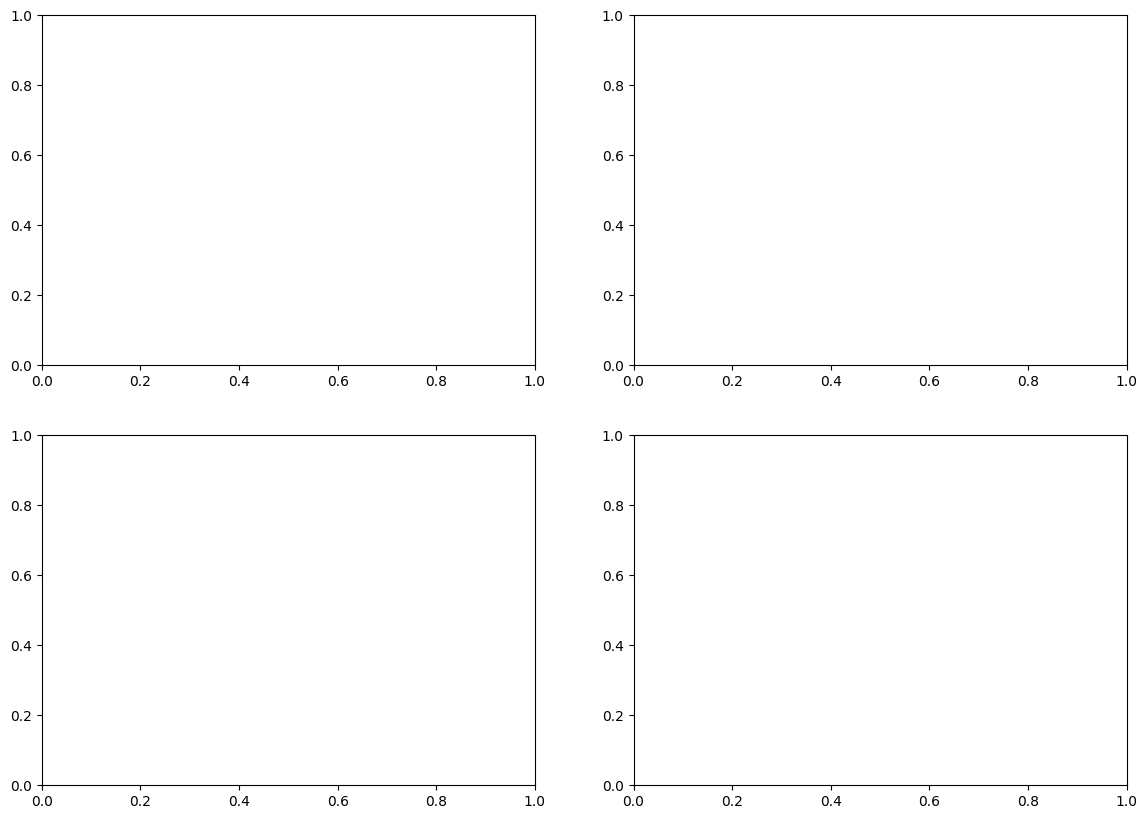

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))  # 2 rows, 2 columns

# Define color palette
colors = ['royalblue', 'tomato']

spectra_list = [spectra_pixel, exemplar_pixel]
gan_list = [pixel_gan[0], exemplar_gan[0]]  # Assuming the GAN outputs need indexing

# Loop over the two items in spectra_list and gan_list
for i in range(2):
    # Plot spectra on the left column
    axs[i, 0].plot(spectra_list[i], color=colors[0], linewidth=2)
    axs[i, 0].set_title(f'Spectra {i+1}', fontsize=16)
    axs[i, 0].set_xlabel('Wavelength or Feature Index', fontsize=14)
    axs[i, 0].set_ylabel('Intensity or Value', fontsize=14)
    axs[i, 0].tick_params(axis='both', labelsize=12)
    axs[i, 0].grid(True, color='lightgray', linestyle='--', linewidth=0.5)
    
    # Plot GAN representation on the right column
    axs[i, 1].plot(gan_list[i], color=colors[1], linewidth=2)
    axs[i, 1].set_title(f'GAN Representation {i+1}', fontsize=16)
    axs[i, 1].set_xlabel('Wavelength or Feature Index', fontsize=14)
    axs[i, 1].set_ylabel('Intensity or Value', fontsize=14)
    axs[i, 1].tick_params(axis='both', labelsize=12)
    axs[i, 1].grid(True, color='lightgray', linestyle='--', linewidth=0.5)

plt.tight_layout(pad=3.0)  # Adjust padding between plots
plt.show()


In [6]:
Names ={
    'Gypsum': [100,69,68],
    'Ferric Hydroxysulfate': [250,69,69],
    'Hematite': [180, 34, 34],
    'Nontronite': [107, 142, 35],
    'Saponite': [124, 252, 0],
    'Prehnite': [102, 205, 170],
    'Jarosite': [255, 223, 0],
    'Serpentine': [50, 205, 50],
    'Alunite': [178, 190, 181],
    'Calcite': [248, 248, 255],
    'Beidellite': [210, 180, 140],
    'Kaolinite': [250, 235, 215],
    'Bassanite': [188, 152, 126],
    'Epidote': [85, 105, 47],
    'Montmorillonite': [160, 82, 45],
    'Mg Cl salt': [238, 232, 170],
    'Halloysite': [255, 228, 181],
    'Illite_Muscovite': [245, 245, 220],
    'Margarite': [255, 228, 196],
    'Analcime': [240, 255, 240],
    'Monohydrated sulfate': [255, 228, 225],
    'MgCO3': [233, 150, 122],
    'Chlorite': [143, 188, 143],
    'Clinochlore': [221, 160, 221],
    'Low Ca Pyroxene': [240, 128, 128],
    'Olivine Forsterite': [238, 130, 238],
    'High Ca Pyroxene': [0, 128, 128],
    'Olivine Fayalite': [0, 100, 0] 

}

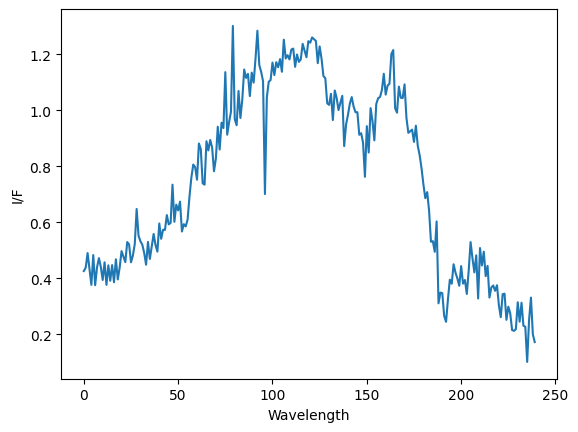

In [20]:
plt.plot(spectra[100,100]*1.5)
# plt.grid(True)
plt.xlabel('Wavelength')
plt.ylabel('I/F')
plt.savefig('spectra.png', dpi = 400)


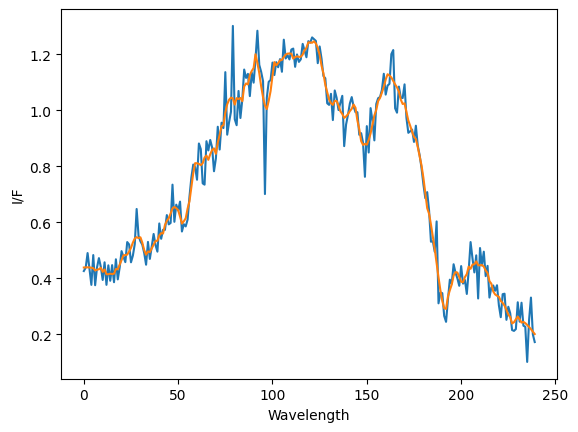

In [23]:
from scipy.signal import savgol_filter
sav_gol = savgol_filter(spectra[100,100], 11, 2)

plt.plot(spectra[100,100]*1.5)
plt.plot(sav_gol*1.5)
# plt.grid(True)
plt.xlabel('Wavelength')
plt.ylabel('I/F')
plt.savefig('spectra.png', dpi = 400)

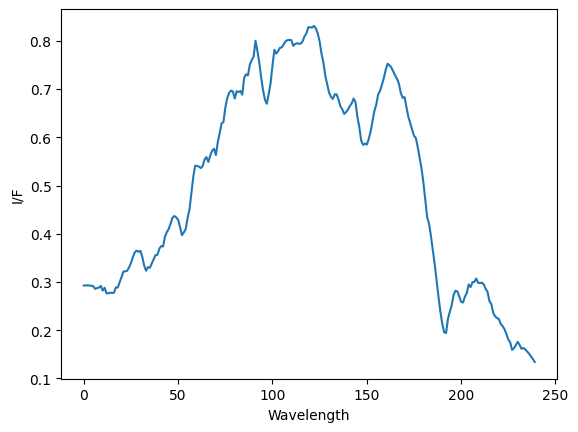

In [24]:
plt.plot(sav_gol)
# plt.grid(True)
plt.xlabel('Wavelength')
plt.ylabel('I/F')
plt.savefig('spectra.png', dpi = 400)


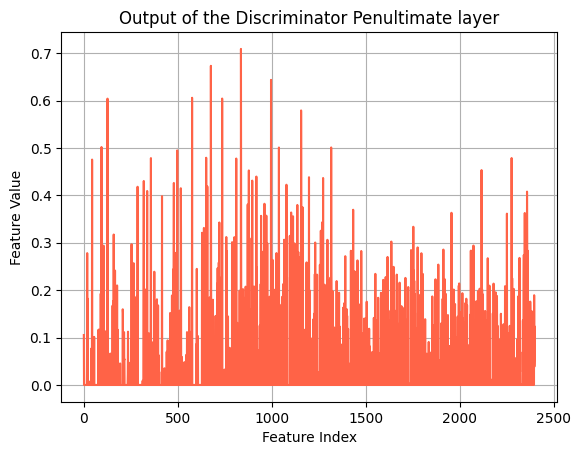

In [35]:
plt.plot(gan_list[0][0], color = 'tomato')
plt.grid(True)
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.title('Output of the Discriminator Penultimate layer')
plt.savefig('dic_pen_rep.png', dpi = 400)

In [4]:
import numpy as np
BANDS = np.array([
    1.021, 1.02755, 1.0341, 1.04065, 1.0472, 1.05375, 1.0603, 1.06685,
    1.07341, 1.07996, 1.08651, 1.09307, 1.09962, 1.10617, 1.11273, 1.11928,
    1.12584, 1.13239, 1.13895, 1.14551, 1.15206, 1.15862, 1.16518, 1.17173,
    1.17829, 1.18485, 1.19141, 1.19797, 1.20453, 1.21109, 1.21765, 1.22421,
    1.23077, 1.23733, 1.24389, 1.25045, 1.25701, 1.26357, 1.27014, 1.2767,
    1.28326, 1.28983, 1.29639, 1.30295, 1.30952, 1.31608, 1.32265, 1.32921,
    1.33578, 1.34234, 1.34891, 1.35548, 1.36205, 1.36861, 1.37518, 1.38175,
    1.38832, 1.39489, 1.40145, 1.40802, 1.41459, 1.42116, 1.42773, 1.43431,
    1.44088, 1.44745, 1.45402, 1.46059, 1.46716, 1.47374, 1.48031, 1.48688,
    1.49346, 1.50003, 1.50661, 1.51318, 1.51976, 1.52633, 1.53291, 1.53948,
    1.54606, 1.55264, 1.55921, 1.56579, 1.57237, 1.57895, 1.58552, 1.5921,
    1.59868, 1.60526, 1.61184, 1.61842, 1.625, 1.63158, 1.63816, 1.64474,
    1.65133, 1.65791, 1.66449, 1.67107, 1.67766, 1.68424, 1.69082, 1.69741,
    1.70399, 1.71058, 1.71716, 1.72375, 1.73033, 1.73692, 1.74351, 1.75009,
    1.75668, 1.76327, 1.76985, 1.77644, 1.78303, 1.78962, 1.79621, 1.8028,
    1.80939, 1.81598, 1.82257, 1.82916, 1.83575, 1.84234, 1.84893, 1.85552,
    1.86212, 1.86871, 1.8753, 1.8819, 1.88849, 1.89508, 1.90168, 1.90827,
    1.91487, 1.92146, 1.92806, 1.93465, 1.94125, 1.94785, 1.95444, 1.96104,
    1.96764, 1.97424, 1.98084, 1.98743, 1.99403, 2.00063, 2.00723, 2.01383,
    2.02043, 2.02703, 2.03363, 2.04024, 2.04684, 2.05344, 2.06004, 2.06664,
    2.07325, 2.07985, 2.08645, 2.09306, 2.09966, 2.10627, 2.11287, 2.11948,
    2.12608, 2.13269, 2.1393, 2.1459, 2.15251, 2.15912, 2.16572, 2.17233,
    2.17894, 2.18555, 2.19216, 2.19877, 2.20538, 2.21199, 2.2186, 2.22521,
    2.23182, 2.23843, 2.24504, 2.25165, 2.25827, 2.26488, 2.27149, 2.2781,
    2.28472, 2.29133, 2.29795, 2.30456, 2.31118, 2.31779, 2.32441, 2.33102,
    2.33764, 2.34426, 2.35087, 2.35749, 2.36411, 2.37072, 2.37734, 2.38396,
    2.39058, 2.3972, 2.40382, 2.41044, 2.41706, 2.42368, 2.4303, 2.43692,
    2.44354, 2.45017, 2.45679, 2.46341, 2.47003, 2.47666, 2.48328, 2.4899,
    2.49653, 2.50312, 2.50972, 2.51632, 2.52292, 2.52951, 2.53611, 2.54271,
    2.54931, 2.55591, 2.56251, 2.56911, 2.57571, 2.58231, 2.58891, 2.59551
])
BANDS.shape

(240,)

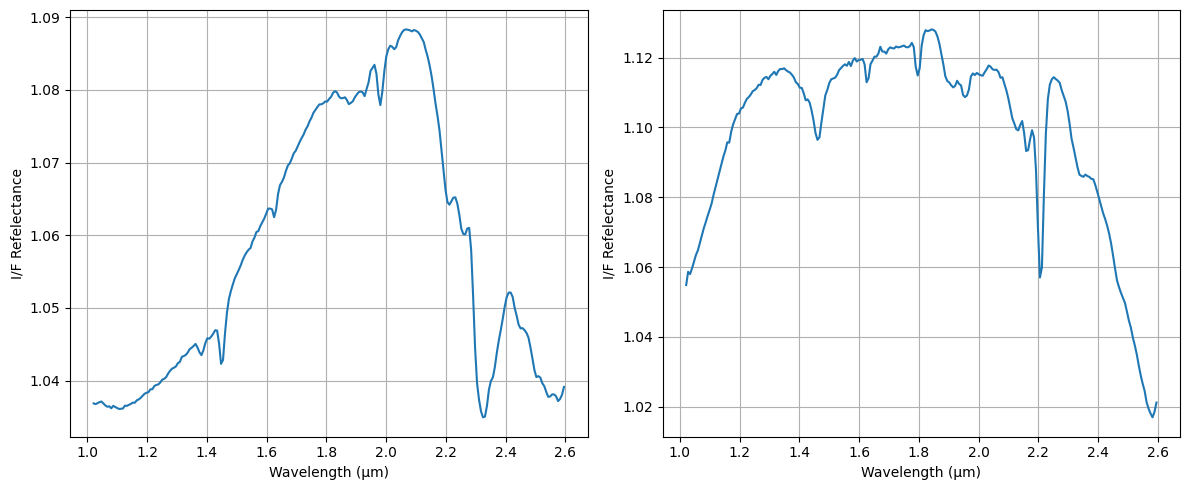

In [26]:

fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 2 rows, 1 column

axs[0].plot(BANDS, exemplars[5])
axs[0].grid(True)
axs[0].set_xlabel('Wavelength (µm)')
axs[0].set_ylabel('I/F Refelectance')

axs[1].plot(BANDS, exemplars[1])
axs[1].grid(True)
axs[1].set_xlabel('Wavelength (µm)')
axs[1].set_ylabel('I/F Refelectance')

plt.tight_layout()

plt.savefig('spectra_to_explain.png', dpi = 400)

Sequential(
  (0): Reshape()
  (1): Conv1d(1, 20, kernel_size=(11,), stride=(2,), padding=(5,))
  (2): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): LeakyReLU(negative_slope=0.2)
  (4): Dropout(p=0.4, inplace=False)
  (5): Conv1d(20, 40, kernel_size=(11,), stride=(2,), padding=(5,))
  (6): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): LeakyReLU(negative_slope=0.2)
  (8): Dropout(p=0.4, inplace=False)
  (9): Conv1d(40, 80, kernel_size=(11,), stride=(2,), padding=(5,))
  (10): LeakyReLU(negative_slope=0.1)
  (11): BatchNorm1d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): Dropout(p=0.4, inplace=False)
  (13): Conv1d(80, 160, kernel_size=(11,), stride=(2,), padding=(5,))
  (14): LeakyReLU(negative_slope=0.1)
  (15): BatchNorm1d(160, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (16): Dropout(p=0.4, inplace=False)
  (17): Flatten(start_dim=1, end_dim=-1)
)
